In [1]:
import json
import sys
import glob
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

In [2]:
DIR = "/home/claudio/hdd/git/bachelorThesis/table_iii/"

In [3]:
NAMES = {-1: "No termination", 0: "SUBMIT", 1: "QUEUE", 2: "ENABLE", 
          3: "SCHEDULE", 4: "EVICT", 5: "FAIL", 6: "FINISH",
          7: "KILL", 8: "LOST", 9: "UPDATE_PENDING", 10: "UPDATE_RUNNING"}

def rename(df, new, old):
    df.rename(columns={old: new}, inplace=True)

In [14]:
display(Markdown("# Table III"))
for cluster in "abcdefgh":
    df = pd.read_csv(glob.glob(DIR + "/table-iii-" + cluster + ".csv/part-00000-*")[0])
    df = df[df["task_term"].isin(range(4,8))]
    df = df.sort_values("task_term")
    df["mean"] = df["mean"].round(2).apply(lambda x: "%.02f" % x) + " (" + df["%95"].apply(lambda x: "%d" % x) + ")"
    rename(df, "# Evts. mean (95-th percentile)", "mean")
    del df["%95"]
    
    for i in [4,5,6,7]:
        df.loc[df.task_term == i, "task_term"] = NAMES[i]
        df["avg_count_%d" % i] = df["avg_count_%d" % i].round(2)
        rename(df, "mean # " + NAMES[i] + " evts.", "avg_count_" + str(i))
    for i in [0,1,2,3,8,9,10]:
        del df["avg_count_" + str(i)]
    rename(df, "Task termination", "task_term")
    print(("\\tableIII{" + cluster.upper() + "}{"))
    print(df.to_latex(index=False), end="}\n")


# Table III

\tableIII{A}{
\begin{tabular}{llrrrr}
\toprule
Task termination & \# Evts. mean (95-th percentile) &  mean \# EVICT evts. &  mean \# FAIL evts. &  mean \# FINISH evts. &  mean \# KILL evts. \\
\midrule
           EVICT &                   428.55 (2924) &               73.69 &               0.77 &                 0.00 &              28.77 \\
            FAIL &                     50.04 (108) &                0.29 &              11.06 &                 0.00 &               0.47 \\
          FINISH &                       12.41 (9) &                0.02 &               0.00 &                 2.15 &               0.01 \\
            KILL &                      27.40 (58) &                2.35 &               0.21 &                 0.00 &               3.40 \\
\bottomrule
\end{tabular}
}
\tableIII{B}{
\begin{tabular}{llrrrr}
\toprule
Task termination & \# Evts. mean (95-th percentile) &  mean \# EVICT evts. &  mean \# FAIL evts. &  mean \# FINISH evts. &  mean \# KILL evts. \\
\midrule
    

In [7]:
display(Markdown("# Table IV"))
for cluster in "abcdefgh":
    df = pd.read_csv(glob.glob(DIR + "/table-iv-evts-" + cluster + ".csv/part-00000-*")[0], header=None,
                names=["term"] + [str(i) for i in range(0,11)])
    df2 = pd.read_csv(glob.glob(DIR + "/table-iv-tasks-" + cluster + ".csv/part-00000-*")[0], header=None,
            names=["term", "# Tasks mean", "# Tasks 95% p.tile"])
    df["term"] = df["term"].astype(int)
    df2["term"] = df2["term"].astype(int)
    df.sort_values(by="term", inplace=True)
    df2.sort_values(by="term", inplace=True)
    
    df = df2.merge(df, on="term", how="outer")

    rename(df, "# Evts. mean", "mean")
    rename(df, "# Evts. 95% p.tile", "%95")
    
    for i in [-1,4,5,6,7,8]:
        df.loc[df.term == i, "term"] = NAMES[i]
        rename(df, "# " + NAMES[i] + " Evts. mean", str(i))
    for i in [0,1,2,3,9,10]:
        del df[str(i)]
    rename(df, "Job termination", "term")
    print(("\\tableIV{" + cluster.upper() + "}{"))
    print(df.to_latex(index=False), end="}\n")


# Table IV

\tableIV{A}{
\begin{tabular}{lrrrrrrr}
\toprule
Job termination &  \# Tasks mean &  \# Tasks 95\% p.tile &  \# EVICT Evts. mean &  \# FAIL Evts. mean &  \# FINISH Evts. mean &  \# KILL Evts. mean &  \# LOST Evts. mean \\
\midrule
 No termination &     92.359436 &               174.3 &           23.263951 &           3.454474 &            23.047597 &          34.565608 &           0.707709 \\
          EVICT &     -1.000000 &                -1.0 &                 NaN &                NaN &                  NaN &                NaN &                NaN \\
           FAIL &     90.792728 &               499.0 &            0.694942 &           0.683556 &             0.085957 &           1.849587 &           0.009730 \\
         FINISH &      1.187092 &                 1.0 &            0.004696 &           0.001341 &             1.072623 &           0.024396 &           0.000952 \\
           KILL &     16.533171 &                10.0 &            1.045419 &           0.073867 &            

In [70]:
max_count = 50

<ipython-input-101-e0a194a108e9>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft[i][dfi.succ == 0][dfi.non == 0]["perc"] = 0


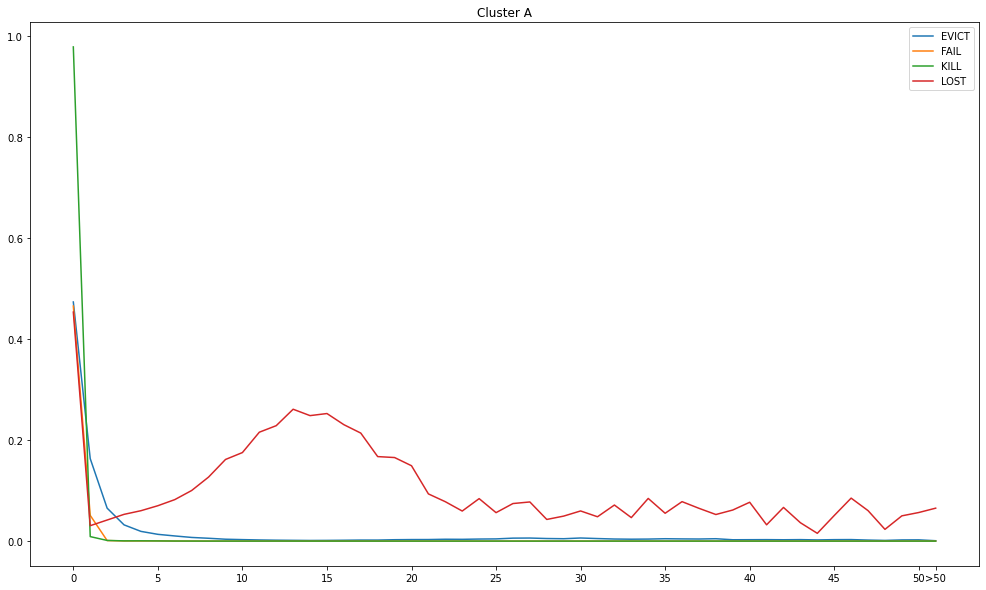

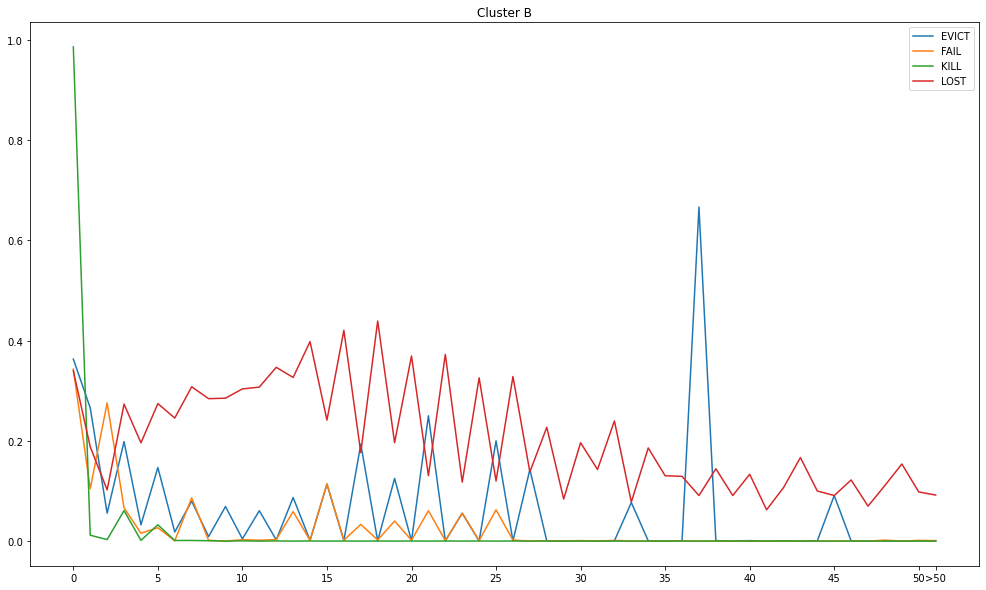

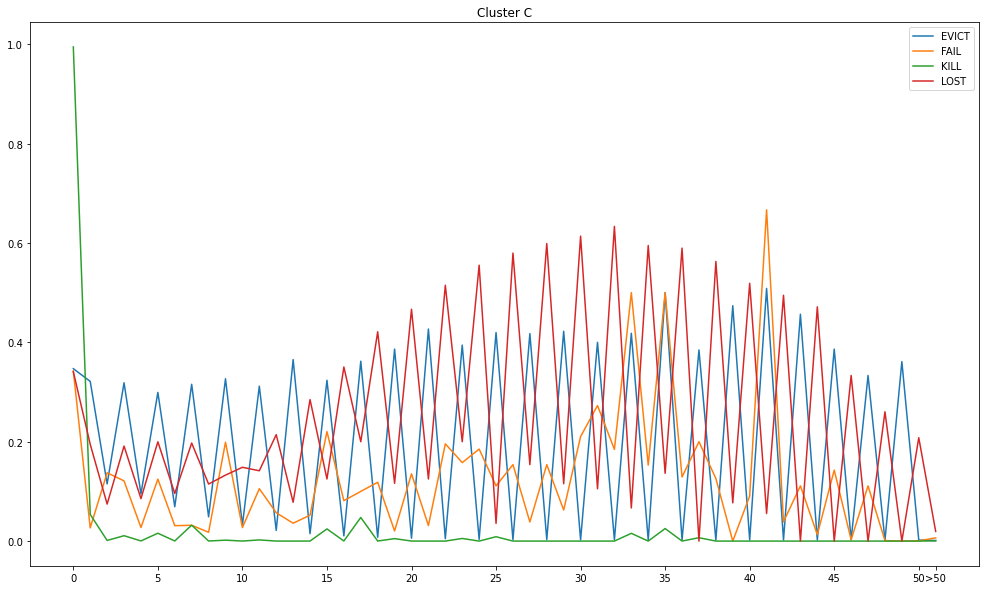

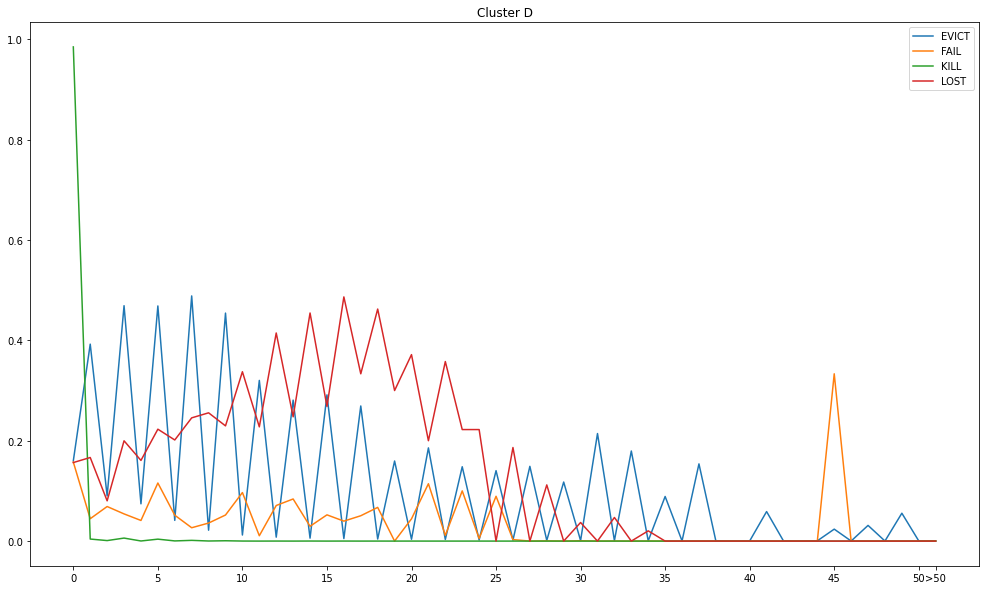

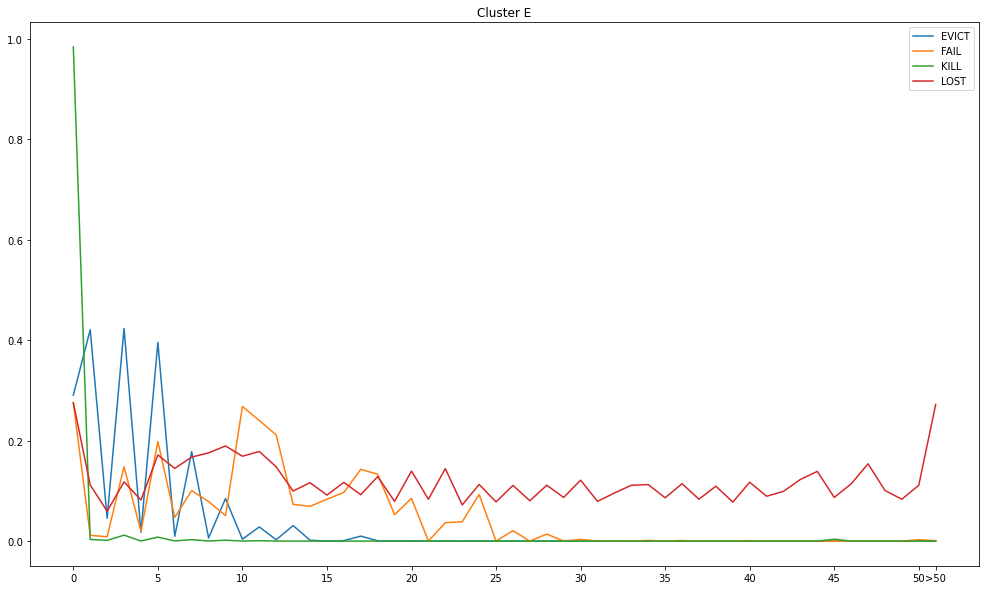

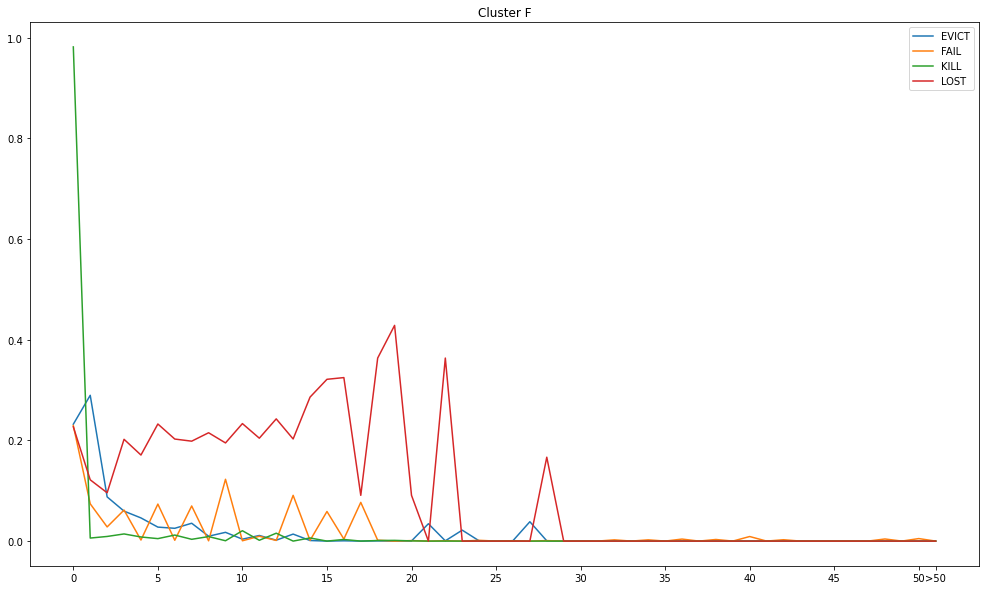

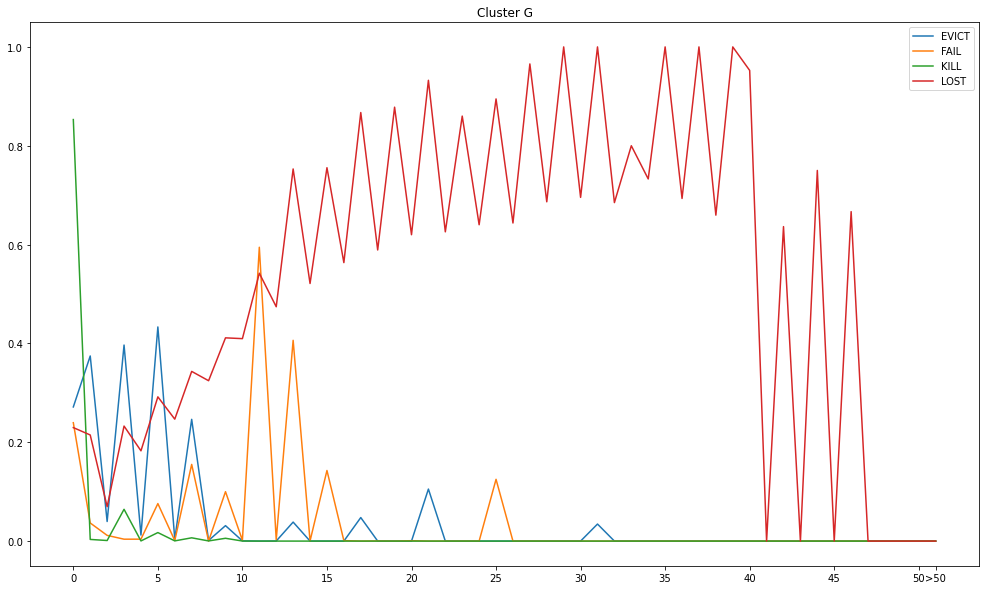

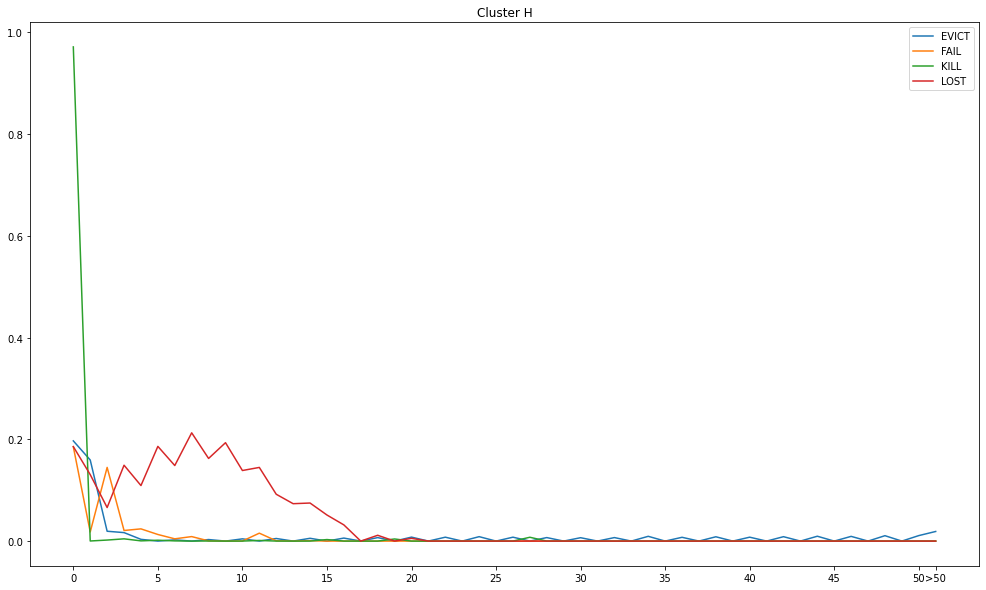

In [101]:
for cluster in "abcdefgh":
    df = pd.read_csv(glob.glob(DIR + "fig-5-" + cluster + ".csv/part-00000-*")[0], 
                     names=["count_4", "count_5", "count_7", "count_8", "succ", "non"])
    dft = {}
    plt.figure(figsize=(17,10))
    for i in [4,5,7,8]:
        dft[i] = df[["count_" + str(i), "succ", "non"]].copy()
        dft[i] = dft[i].groupby("count_" + str(i)).sum().reset_index()
        
        over = dft[i][dft[i]["count_" + str(i)] > max_count].sum()
        if over["succ"] == 0 and over["non"] == 0:
            percover = 0
        else:
            percover = over["succ"] / (over["succ"] + over["non"])
        
        dft[i]["perc"] = dft[i]["succ"] / (dft[i]["succ"] + dft[i]["non"])
        dfi = dft[i]
        dft[i][dfi.succ == 0][dfi.non == 0]["perc"] = 0
        
        dft[i] = dft[i].drop(dft[i][dft[i]["count_" + str(i)] > max_count].index)
        #dft[i]["count_" + str(i)] = dft[i]["count_" + str(i)].astype(str)
        dft[i] = dft[i].append({"count_" + str(i): max_count + 1, "perc": percover}, ignore_index=True)

        del dft[i]["succ"]
        del dft[i]["non"]
        plt.xticks([0,5,10,15,20,25,30,35,40,45,50,51])
        
        ys = []
        for j in range(0, max_count + 2):
            a = dft[i][dft[i]["count_" + str(i)] == j]
            ys.append(0 if a.empty else a["perc"].squeeze())
     
        plt.plot([x if x < 51 else ">50" for x in range(0,52)], ys)
        plt.title("Cluster " + cluster.upper())
    plt.legend(["EVICT", "FAIL", "KILL", "LOST"])